# Natural Language Processing Explore

1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [18]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import acquire
import prepare

from env import get_db_url

In [3]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# combine all messages in single string by label

ham_words = prepare.basic_clean(' '.join(df[df.label == 'ham'].text))
spam_words = prepare.basic_clean(' '.join(df[df.label == 'spam'].text))
all_words = prepare.basic_clean(' '.join(df.text))

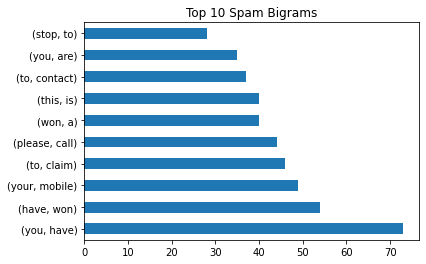

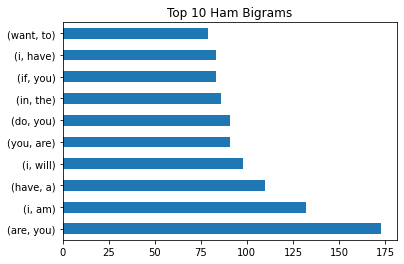

In [48]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Bigrams")
plt.show()
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Bigrams")
plt.show()

Text(0.5, 1.0, 'Ham')

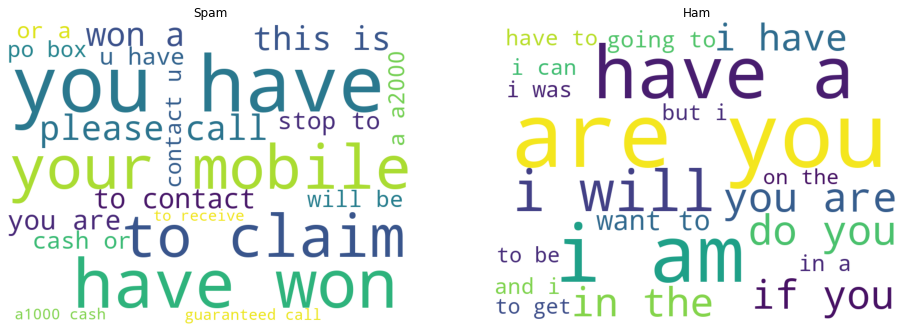

In [46]:
fig, ax = plt.subplots(1,2,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words]):
    bigrams = {k[0] + ' ' + k[1]: v for k,v in pd.Series(nltk.bigrams(word_set.split())).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(bigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")

Bigrams don't have much overlap between ham and spam.

In [90]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
bigram_df = pd.DataFrame()
bigram_df['spam'] = spam_bigrams
bigram_df['ham'] = ham_bigrams
# bigram_df['spam_rank'] = pd.Series(nltk.bigrams(spam_words.split())).value_counts().rank(ascending=False)
# bigram_df['ham_rank'] = pd.Series(nltk.bigrams(ham_words.split())).value_counts().rank(ascending=False)

In [101]:
set(spam_bigrams.head(20).index).intersection(set(ham_bigrams.head(20).index))

{('you', 'are')}

Only overlap is with:
- you, are

## Trigrams  - spam/ham

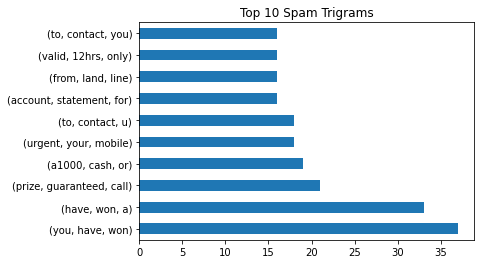

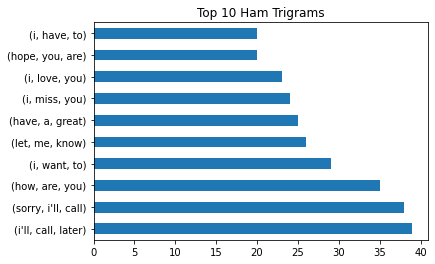

In [80]:
pd.Series(nltk.ngrams(spam_words.split(),3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Trigrams")
plt.show()
pd.Series(nltk.ngrams(ham_words.split(),3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Trigrams")
plt.show()

Text(0.5, 1.0, 'Ham')

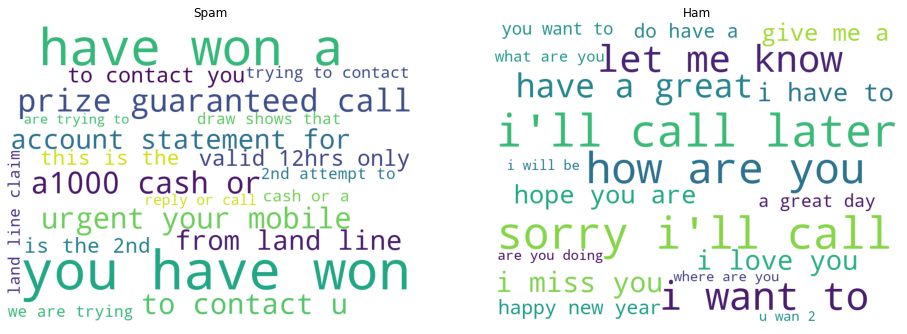

In [84]:
fig, ax = plt.subplots(1,2,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words]):
    trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k,v in pd.Series(nltk.ngrams(word_set.split(),3)).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(trigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")

Trigrams don't have much overlap between ham and spam.

In [102]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(),3)).value_counts()
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(),3)).value_counts()

trigram_df = pd.DataFrame()
trigram_df['spam'] = spam_trigrams
trigram_df['ham'] = ham_trigrams


In [103]:
trigram_df.fillna(0).sort_values(by=['spam','ham'],ascending=False).head(20)

,spam,ham
"(you, have, won)",37,0.0
"(have, won, a)",33,0.0
"(prize, guaranteed, call)",21,0.0
"(a1000, cash, or)",19,0.0
"(urgent, your, mobile)",18,0.0
"(to, contact, u)",18,0.0
"(to, contact, you)",16,1.0
"(account, statement, for)",16,0.0
"(from, land, line)",16,0.0
"(valid, 12hrs, only)",16,0.0


In [107]:
set(spam_trigrams.head(20).index).intersection(set(ham_trigrams.head(20).index))

set()

No overlap between top 20 trigrams

In [108]:
set(spam_trigrams.head(100).index).intersection(set(ham_trigrams.head(100).index))

{('do', 'you', 'want')}

At top 100 trigrams we get 1 overlap

# Blog posts exploration

In [178]:
df = prepare.create_prepared_blog_df()

In [179]:
df.date_published = pd.to_datetime(df.date_published)

Breaking up posts into older and newer (2022 vs earlier) for comparison

In [180]:
older = df[df.date_published<'2022']
newer = df[df.date_published>='2022']

In [181]:
all_articles = ' '.join(df.lemmatized)
new_articles = ' '.join(newer.lemmatized)
old_articles = ' '.join(older.lemmatized)

In [182]:
all_words = all_articles.split()
new_words = new_articles.split()
old_words = old_articles.split()


In [183]:
new_freq = pd.Series(new_words).value_counts()
old_freq = pd.Series(old_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [184]:
all_freq.head()

program    64
tech       47
cloud      46
hired      44
career     38
dtype: int64

In [185]:
word_counts = (pd.concat([all_freq, old_freq, new_freq], axis=1, sort=True)
                .set_axis(['all', 'old', 'new'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [186]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,old,new
program,64,38,26
tech,47,19,28
cloud,46,13,33
hired,44,44,0
career,38,20,18
codeup,36,24,12
job,31,23,8
like,31,19,12
student,28,24,4
system,27,26,1


Any words that uniquely identify old vs new posts?

In [187]:
pd.concat([word_counts[word_counts.new == 0].sort_values(by='old').tail(6),
           word_counts[word_counts.old == 0].sort_values(by='new').tail(6)])


,all,old,new
cgi,10,10,0
federal,13,13,0
accenture,14,14,0
java,15,15,0
associate,20,20,0
hired,44,44,0
workshop,8,0,8
castle,10,0,10
book,10,0,10
tec,15,0,15


There are some words that only appear in old vs new

Text(0.5, 1.0, 'Proportion of New vs Old for the 20 most common words')

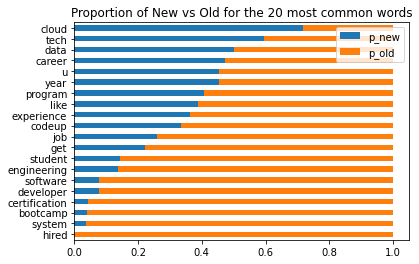

In [188]:
# figure out the percentage of old vs new
(word_counts
 .assign(p_new=word_counts.new / word_counts['all'],
         p_old=word_counts.old / word_counts['all'])
 .sort_values(by='all')
 [['p_new', 'p_old']]
 .tail(20)
 .sort_values('p_new')
 .plot.barh(stacked=True))

plt.title('Proportion of New vs Old for the 20 most common words')


Text(0.5, 1.0, 'New Articles')

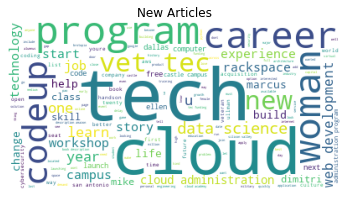

In [189]:
img = WordCloud(background_color='white').generate(new_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('New Articles')

Text(0.5, 1.0, 'Old Articles')

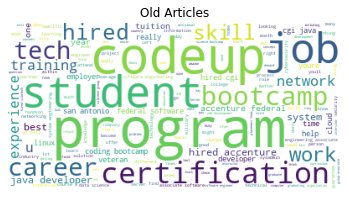

In [190]:
img = WordCloud(background_color='white').generate(old_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Old Articles')

Codeup and program still feature prominently. Seems like cloud is getting more traction in new articles and there's been less emphasis on hiring, certification, and job lately.

In [191]:
old_bigrams = nltk.ngrams(old_words, 2)
new_bigrams = nltk.ngrams(new_words, 2)

In [192]:
top_20_old_bigrams = (pd.Series(nltk.ngrams(old_words, 2))
                      .value_counts()
                      .head(20))
top_20_new_bigrams = (pd.Series(nltk.ngrams(new_words, 2))
                      .value_counts()
                      .head(20))


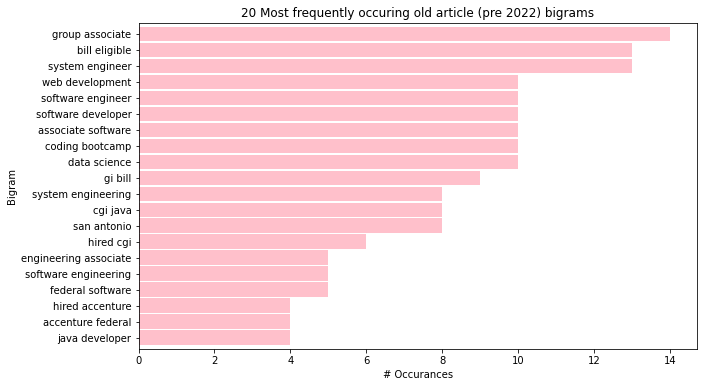

In [193]:
top_20_old_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring old article (pre 2022) bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_old_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


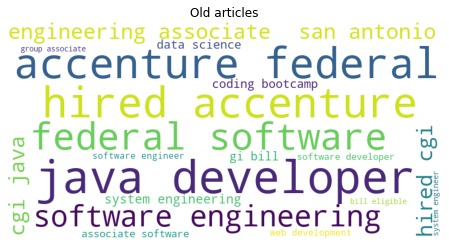

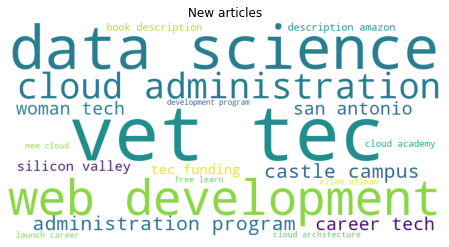

In [194]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_old_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Old articles')
plt.show()
data = {k[0] + ' ' + k[1]: v for k, v in top_20_new_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('New articles')
plt.show()



Data science more talked about lately! Hiring not so much...

# News exploration

In [280]:
df = prepare.create_prepared_news_df(extra_words=["'"])

Importing from csv


In [281]:
df

,title,author,datetime,category,original,clean,stemmed,lemmatized
0,"Delhi sees less than 1,000 new COVID-19 cases,...",Deepika Bhatt,2022-05-09T17:40:11.000Z,national,Delhi on Monday reported 799 new cases of COVI...,delhi monday reported 799 new cases covid19 th...,delhi monday report 799 new case covid19 three...,delhi monday reported 799 new case covid19 thr...
1,Parts of Mumbai face power outages due to tech...,Shreyasi Banerjee,2022-05-09T17:30:34.000Z,national,Power outages were reported in parts of Mumbai...,power outages reported parts mumbai including ...,power outag report part mumbai includ bandra k...,power outage reported part mumbai including ba...
2,CBI books former staff member of TMC MLA Babul...,Shreyasi Banerjee,2022-05-09T15:45:34.000Z,national,The Central Bureau of Investigation (CBI) has ...,central bureau investigation cbi booked former...,central bureau investig cbi book former staff ...,central bureau investigation cbi booked former...
3,"2, including toddler, burnt alive as car catch...",Shreyasi Banerjee,2022-05-09T16:26:54.000Z,national,"Two people, including a toddler, were charred ...",two people including toddler charred death two...,two peopl includ toddler char death two famili...,two people including toddler charred death two...
4,11 fishermen stranded in Odisha sea airlifted ...,Shreyasi Banerjee,2022-05-09T16:57:17.000Z,national,"Eleven fishermen, who were stranded in the Son...",eleven fishermen stranded sonepur sea odisha g...,eleven fishermen strand sonepur sea odisha gan...,eleven fisherman stranded sonepur sea odisha g...
...,...,...,...,...,...,...,...,...
294,Mercedes looking at energy options should Russ...,Aishwarya Awasthi,2022-04-29T10:28:26.000Z,automobile,Mercedes-Benz is looking at energy alternative...,mercedesbenz looking energy alternatives russi...,mercedesbenz look energi altern russia cut ga ...,mercedesbenz looking energy alternative russia...
295,Saudi Arabia to buy 1 lakh EVs over 10 yrs: Lu...,Aishwarya Awasthi,2022-04-27T05:38:55.000Z,automobile,Luxury EV maker Lucid has said that the govern...,luxury ev maker lucid said government saudi ar...,luxuri ev maker lucid said govern saudi arabia...,luxury ev maker lucid said government saudi ar...
296,Pune has best environment to become an automob...,Medhaa Gupta,2022-05-07T03:15:18.000Z,automobile,Union Minister Nitin Gadkari on Friday said th...,union minister nitin gadkari friday said pune ...,union minist nitin gadkari friday said pune be...,union minister nitin gadkari friday said pune ...
297,"18-year-old boy develops AI, sensor-based bicy...",Dharini Mudgal,2022-04-28T11:04:46.000Z,automobile,"Bengaluru-based 18-year-old boy, Nihar Thakkar...",bengalurubased 18yearold boy nihar thakkar dev...,bengalurubas 18yearold boy nihar thakkar devel...,bengalurubased 18yearold boy nihar thakkar dev...


In [282]:
def generate_category_words(df, categorical = 'category'):
    """ Joins all words in each news article per category. Outputs dataframe with all_words by category."""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized)
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized)
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [283]:
all_words_df=generate_category_words(df)

In [295]:
def generate_word_count_df(all_words_df):
    
    
    all_words_df = pd.concat([all_words_df, all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    return all_words_df

In [296]:
# all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())

In [297]:
generate_word_count_df(all_words_df)

,all_words,said,monday,police,case,official,lakh,district,reported,reportedly,...,collapsed,managedbut,somehow,doubling,train,fastmoving,brake,putting,chip,2026
national,delhi monday reported 799 new case covid19 thr...,20.0,16.0,13.0,8.0,7.0,6.0,6.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business,indian rupee fell alltime low 7742 u dollar mo...,15.0,10.0,NaN,1.0,NaN,2.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,australia wicketkeeperbatter alyssa healy sout...,16.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
world,house member sri lanka ruling party set fire m...,13.0,14.0,4.0,NaN,2.0,NaN,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
politics,central bureau investigation cbi booked former...,24.0,14.0,7.0,1.0,NaN,3.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
technology,bitcoin fell monday low 33266 morning trade ne...,9.0,2.0,NaN,2.0,NaN,NaN,NaN,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startup,open becoming india 100th unicorn startup valu...,14.0,1.0,NaN,1.0,NaN,2.0,NaN,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entertainment,actor aayush sharma refuted report politician ...,19.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
miscellaneous,amidst controversy surrounding third umpire ca...,10.0,NaN,7.0,1.0,2.0,1.0,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hatke,ukbased company hired 24yearold jonathan swift...,11.0,NaN,4.0,NaN,NaN,2.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
